# Introduction

In this motebook, we will build a simple image classification model using convolutional neural network to predict whether an image is cat or dog. I will be using Keras framework to solve the problem. The training dataset cointains labelelled images of dogs and cats. In machine learning learning concepts is equally important as applying them in Python. To bridge this gap, I will also add mathematical aspects as well as the reason behind doing any of the steps of convolutional neural network so that you can have a better understanding of the concept.

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:

# import libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import shutil

Using TensorFlow backend.


In [3]:
#creating a data folder

!mkdir data

In [4]:
!cp ../input/dogs-vs-cats/* data

In [5]:
!ls

__notebook_source__.ipynb  data


# Part 1 - Prepare Data

In [6]:
#unzipping train set
import zipfile
with zipfile.ZipFile ('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train/')

In [7]:
filenames = os.listdir('data/train/train/')
categories = []
for filename in filenames:
    category = filename.split(".")[0]
    if category == 'dog':
        categories.append(1)
    if category == 'cat':
        categories.append(0)
df = pd.DataFrame({'filename':filenames, 'category':categories})

In [8]:
df.head()

,filename,category
0,dog.8141.jpg,1
1,dog.9552.jpg,1
2,cat.2654.jpg,0
3,dog.6629.jpg,1
4,dog.12482.jpg,1


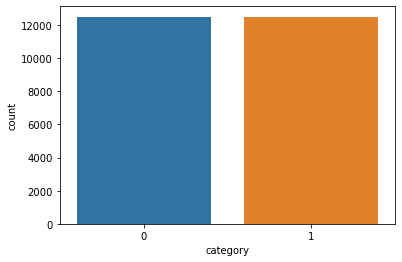

In [9]:
sns.countplot(df.category)

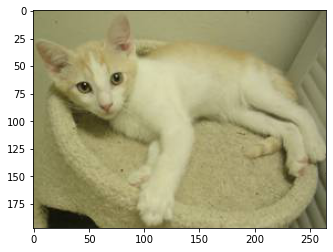

In [10]:
# A Random Image
random_number = np.random.randint(1, 25000, 1)
plt.imshow(load_img('data/train/train/' + df['filename'][int(random_number)]))

In [11]:
df['category'] = df['category'].replace({1:'dog', 0:'cat'})

In [12]:
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df.reset_index(drop = True, inplace = True)
validate_df.reset_index(drop = True, inplace = True)

In [13]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

In [15]:
# training generator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.1, zoom_range = 0.2, rotation_range = 15,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1
                                  ,height_shift_range = 0.1)
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                   'data/train/train/',
                                                   x_col = 'filename',
                                                   y_col = 'category',
                                                   target_size = (64,64),
                                                   class_mode = 'categorical',
                                                   batch_size = 15)


Found 20000 validated image filenames belonging to 2 classes.


In [16]:
# Validation generator
validate_datagen = ImageDataGenerator(rescale = 1./225)
validate_generator = validate_datagen.flow_from_dataframe(validate_df, directory = 'data/train/train/',
                                                          x_col = 'filename', y_col = 'category'
                                                          ,target_size = (64,64),
                                                          batch_size = 15, class_mode = 'categorical')

Found 5000 validated image filenames belonging to 2 classes.


Checking the results of our generator

In [17]:
sample_df = df.sample(n=4)
example_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
example_data = example_datagen.flow_from_dataframe(sample_df, )

,filename,category
19928,cat.5821.jpg,cat
15956,dog.10114.jpg,dog
23592,dog.2274.jpg,dog
20277,dog.8940.jpg,dog
7849,dog.11137.jpg,dog
7957,cat.8483.jpg,cat
23984,dog.12354.jpg,dog


# Part 2 - Build Model

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
# building the model
model = Sequential()
# convolution - number of filters are chosen arbitrarily for now
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))
# pooling - arbitrary choice
model.add(MaxPooling2D(pool_size = 2, strides = 2))
# second convolutional layer
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
# max pooling for second layer
model.add(MaxPooling2D(pool_size = 2, strides = 2))
# flattening
model.add(Flatten())
# Full Connection
model.add(Dense(units = 128, activation = 'relu'))
# Output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Part 3 - Train the model

Image augmentation is important to reduce overfitting.

In [ ]:
# image augmentation
train_datagen = ImageDataGenerator(shear_range = 0.2, zoom_range = 0.2, rescale=1./255, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
#import data
training_set = train_datagen.flow_from_directory('data/train/train/', target_size = (64,64), batch_size = 32,
                                                class_mode = 'binary')
test_set = test_datagen.flow_from_directory('data/test/', target_size = (64,64), batch_size = 32,
                                           class_mode = 'binary')
